<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/5.%20Object%20Detection%20with%20OpenCV%20and%20Python/1_ObjectDetection_OpenCV_Introduction_Template_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Object Detection with OpenCV and Python 

In this section, we will cover the Introduction to Object Detection and Template Matching.

These are the objectives for Object Detection overall:

- <b> Template Matching: </b> Simply looking for an exact copy of an image in another image.
- Other Detection methods:
 - <b> Corner Detection: </b>Looking for corners in images
 - <b> Edge Detection: </b> Expanding to find general edges of objects
 - <b> Grid Detection: </b> Combining both concepts to find grids in images.
- <b> Contour Detection :</b> Allows us to detect foreground vs background images. Also, allows for detection of external vs internal contours
 - Ex. grabbing eyes and smaile from a face
- <b> Feature Matching: </b> More advanced methods of detecting matched objects in another image, even if the target iamge is not shown exactly the same in the image we are searching.
- <b> Watershed Algorithms: </b>
 - Advanced algorithm that allows us to segment images into foreground and background.
 - Also allows us to manually set seeds to choose segments of an image.
- <b> Facial & Eye Detection </b>
 - Use of <b> Haar Cascades to detect faces in images</b>
 - This is not facial recognition, that also requires deep learning.
- <b> Project: </b> CV application that can blur license plates automatically.


---

#### Template Matching

Scans a larger image for a provided template by sliding the template target image across the larger image.

- Comparison method: used as the target template is sldie across the larger image.
- methods are sort of correlation based metric

Some of the template macthing modes (operations) are:


![alt text](https://drive.google.com/uc?id=1Brcy61bcF-vVUt5yGWhZ3tObUjO4NGoq)



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

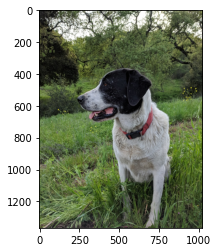

In [2]:
#grab full image that we will be searching

full = cv2.imread('sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

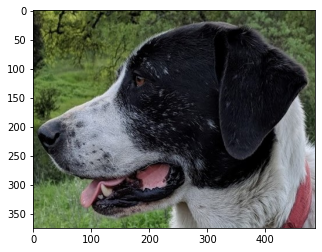

In [3]:
# upload template image - subset of larger image you are searching

face = cv2.imread('sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)



In [4]:
print('Full image shape: ', full.shape)
print('Face size is: ',face.shape)

Full image shape:  (1367, 1025, 3)
Face size is:  (375, 486, 3)


One of the disadvantage of <b> Template Matching </b> is : we need to have exact image of what we are looking for that actually defeats the purpose of object detection

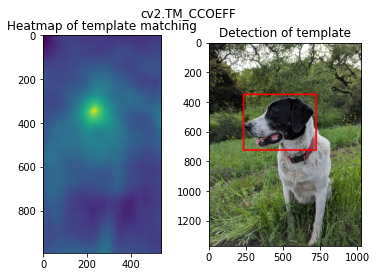

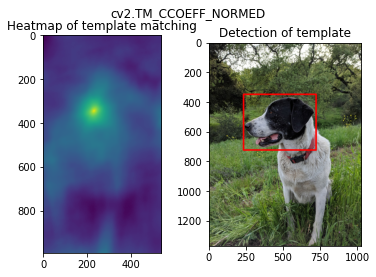

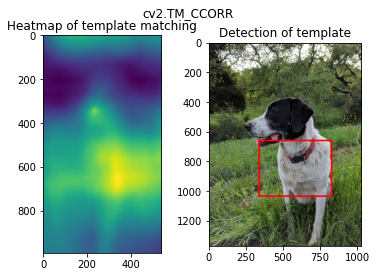

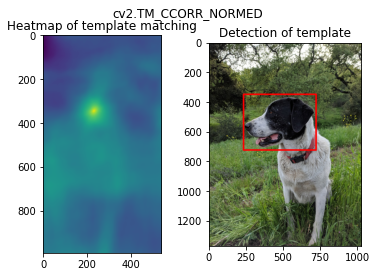

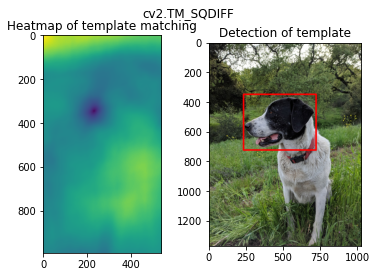

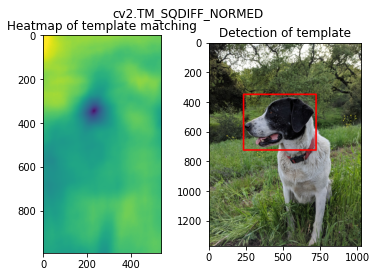

In [5]:
#eval can be used to convert the string into a defined used function

# all 6 methods will be used to comapre template matching results

methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

for m in methods:

  #create a copy for full image
  full_copy = full.copy()
  method = eval(m)

  #Template matching
  res = cv2.matchTemplate(full_copy,face,method) #gives a heat map and can give correlation,squared difference and normalized bsaed heat map results
  
  #Basically we will take out max and min values from ehat map and draw rectangle to the copy

  min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

  #TOP LEFT OF THE RECTANGLE
  if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  
  #BOTTOM RIGHT OF THE RECTANGLE
  height,width,channels = face.shape
  bottom_right = (top_left[0]+width,top_left[1]+height)

  cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)

  #PLOT

  plt.subplot(121)
  plt.imshow(res)
  plt.title('Heatmap of template matching')
  plt.subplot(122)
  plt.imshow(full_copy)
  plt.title('Detection of template')

  ## TITEL with method used
  plt.suptitle(m)

  plt.show()
  print('\n')
  print('\n')





Seems to be TM_CCORR detected the face wrong here in this case